# Preliminaries

In [1]:
import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


tensorflow version 2.10.0


In [5]:
test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
test

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,Real_tom_lsm
0,0,2016-01-01,0.0,20.0,0.000011,80.796135,-2.052292,0.008678,4.996910,-1.678764,-272.04962,0.00000,0.0,0.0
1,1,2016-01-01,0.0,22.5,0.000011,77.748420,-4.445312,0.740505,7.517281,0.792618,-250.63333,0.00000,0.0,0.0
2,2,2016-01-01,0.0,25.0,-0.000001,71.178825,-3.778427,1.056324,9.333221,0.688252,-229.52519,0.00000,0.0,0.0
3,3,2016-01-01,0.0,27.5,-0.000005,73.585754,-4.695709,1.236446,9.589882,0.555519,-240.80815,0.00000,0.0,0.0
4,4,2016-01-01,0.0,30.0,-0.000016,72.382780,-4.002563,0.734211,5.410950,-1.086350,-262.45557,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539482,539482,2019-12-01,-30.0,80.0,0.000006,2.637233,33.277840,5.379345,-0.286896,5.558327,-277.60870,294.14987,0.0,0.0
539483,539483,2019-12-01,-30.0,82.5,-0.000020,23.660923,34.272537,6.438683,-13.026535,2.857349,-270.80573,294.23798,0.0,0.0
539484,539484,2019-12-01,-30.0,85.0,-0.000019,46.051540,35.755882,7.248966,-18.870102,-3.349407,-249.43092,294.26890,0.0,0.0
539485,539485,2019-12-01,-30.0,87.5,-0.000014,55.855648,34.069664,6.349327,-18.801796,-8.172478,-239.36870,294.36630,0.0,0.0


In [17]:
def dataLoad_old():
    test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
    train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')
    print(train.head())
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)

    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    x_test = test.loc[test.time>='2016-04-01'][[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******test features******")
    print (x_test)
    y_test = test.loc[test.time>='2016-04-01'][['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [49]:
### please check

def dataLoad_old_48H():
    test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
    train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')
    print(train.head())
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)

    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']].iloc[:-377,:]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']].iloc[377:,:]
    print ("******training target******")
    print (y_train)
    
    x_test = test.loc[test.time>='2016-04-01'][[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']].iloc[:-377,:]
    print ("******test features******")
    print (x_test)
    y_test = test.loc[test.time>='2016-04-01'][['Real_tom_lsm']].iloc[377:,:]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']].iloc[:-377,:]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']].iloc[377:,:]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [2]:
def dataLoad():
    train = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets_withrealtom.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/validation_sets_withrealtom.csv')
    test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')
    print(train.head())
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)

    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******training features******")
    print (x_train)
    y_train = train.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
    print ("******training target******")
    print (y_train)
    
    x_test = test.loc[test.time>='2016-04-01'][[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******test features******")
    print (x_test)
    y_test = test.loc[test.time>='2016-04-01'].apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******validation features******")
    print (x_val)
    y_val = val.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote and standardization')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
def test_model(model, x_test, y_test):
    
    preds = model.predict(x_test)

    plot_roc(preds,y_test)

    scores = metrics.accuracy_score(y_test, np.round(preds))
    print(f"Accuracy score: {scores}")


    cm = confusion_matrix(y_test, np.round(preds))
    np.set_printoptions(precision=2)
    print(cm) 


# Load, standardization and SMOTE on data

In [3]:
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()


   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  newlsm  new_target  \
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0     0.0         0.0   
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0     0.0         0.0   
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0     0.0         0.0   
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0     0.0         0.0   
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0     0.0         0.0   

   Real_tom_target  
0              0.0  
1             

In [5]:
trainScaler = StandardScaler()

x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

y_train = y_train_sm.values
y_val = y_val.values
y_test = y_test.values

In [18]:
x_train_sm_old, y_train_sm_old, x_val_old, y_val_old, x_test_old, y_test_old = dataLoad_old()


   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [19]:
trainScaler = StandardScaler()

x_train_scaled_old = trainScaler.fit_transform(x_train_sm_old)
x_val_scaled_old = trainScaler.transform(x_val_old)
x_test_scaled_old = trainScaler.transform(x_test_old)

y_train_old = y_train_sm_old.values
y_val_old = y_val_old.values
y_test_old = y_test_old.values


In [50]:
x_train_sm_old_48H, y_train_sm_old_48H, x_val_old_48H, y_val_old_48H, x_test_old_48H, y_test_old_48H = dataLoad_old_48H()


   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850     v_200     v_850

trainScaler = StandardScaler()

x_train_scaled_old_48H = trainScaler.fit_transform(x_train_sm_old_48H)
x_val_scaled_old_48H = trainScaler.transform(x_val_old_48H)
x_test_scaled_old_48H = trainScaler.transform(x_test_old_48H)

y_train_old_48H = y_train_sm_old_48H.values
y_val_old_48H = y_val_old_48H.values
y_test_old_48H = y_test_old_48H.values


# FFNN, new data

In [7]:
model_std_relu_dropout = Sequential()
model_std_relu_dropout.add(Dense(512, input_dim=9, activation='relu'))
model_std_relu_dropout.add(Dropout(0.5))
model_std_relu_dropout.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout.summary()


2023-03-08 16:23:07.159943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.


Metal device set to: Apple M1


2023-03-08 16:23:07.161761: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_std_relu_dropout.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=50)

Epoch 1/50


2023-03-08 16:23:18.923199: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-08 16:23:19.851472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


265686/265686 [==============================] - ETA: 0s - loss: 0.3167

2023-03-08 16:39:18.306513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


265686/265686 [==============================] - 1001s 4ms/step - loss: 0.3167 - val_loss: 0.3151
Epoch 2/50
265686/265686 [==============================] - 988s 4ms/step - loss: 0.3006 - val_loss: 0.2819
Epoch 3/50
265686/265686 [==============================] - 963s 4ms/step - loss: 0.2915 - val_loss: 0.2780
Epoch 4/50
265686/265686 [==============================] - 962s 4ms/step - loss: 0.2843 - val_loss: 0.3359
Epoch 5/50
265686/265686 [==============================] - 966s 4ms/step - loss: 0.2792 - val_loss: 0.2777
Epoch 6/50
265686/265686 [==============================] - 965s 4ms/step - loss: 0.2752 - val_loss: 0.3289
Epoch 7/50
265686/265686 [==============================] - 964s 4ms/step - loss: 0.2720 - val_loss: 0.3012
Epoch 8/50
265686/265686 [==============================] - 1016s 4ms/step - loss: 0.2693 - val_loss: 0.3428
Epoch 8: early stopping


2023-03-08 18:33:45.125831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29053/29053 [==============================] - 34s 1ms/step


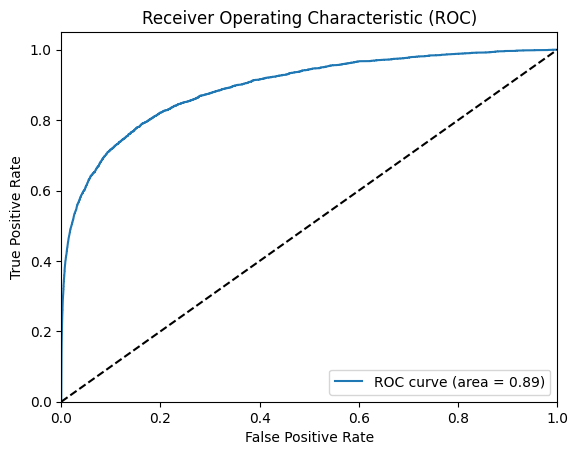

Accuracy score: 0.8752358333279552
[[811247 115157]
 [   834   2444]]


In [9]:
test_model(model_std_relu_dropout, x_test_scaled, y_test)


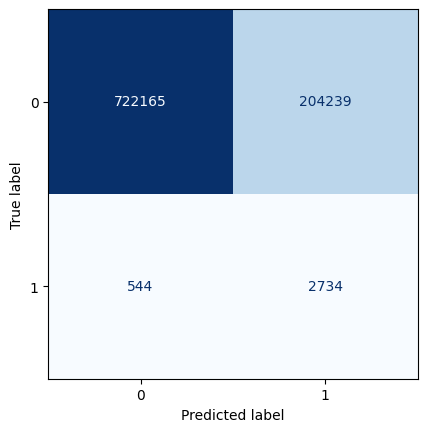

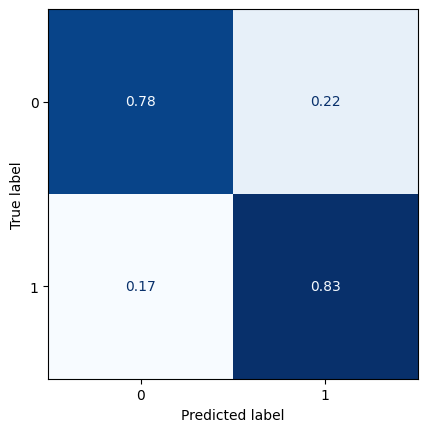

In [11]:
preds = model_std_relu_dropout.predict(x_test_scaled)
classes = []

for i in preds:
    if i<=0.3: classes.append(0)
    else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
ConfusionMatrixDisplay(confusion_matrix(y_test.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

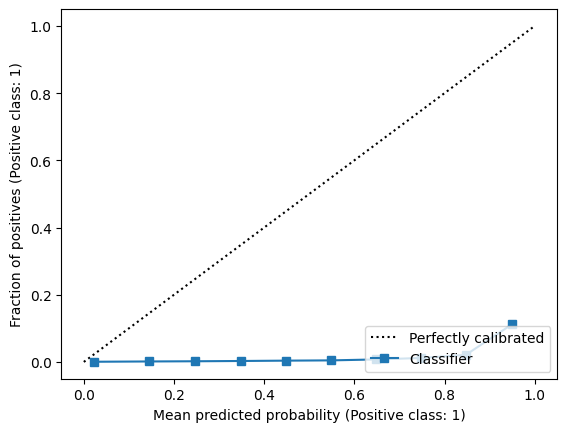

In [12]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test, preds, n_bins=10)


In [13]:
from sklearn.metrics import brier_score_loss
### brier score con probabilità predette
brier_score_loss(y_test, preds)

0.08550116798099401

In [14]:
import os
model_std_relu_dropout.save(os.path.join("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_dropout_std_newData.h5"))


In [15]:
from keras.models import load_model

model_512 = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_dropout_std_newData.h5")


## Different Model

In [16]:
### as an example, try different ones
model2 = Sequential()
model2.add(Dense(9, input_dim=9, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1,activation='sigmoid')) # Output
model2.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 16)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
model2.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=10)

# Old target, next 24 hours

In [20]:
model_std_relu_dropout_24H_old = Sequential()
model_std_relu_dropout_24H_old.add(Dense(512, input_dim=9, activation='relu'))
model_std_relu_dropout_24H_old.add(Dropout(0.5))
model_std_relu_dropout_24H_old.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout_24H_old.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout_24H_old.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               5120      
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### This should be similar to the old result of the FFNN
model_std_relu_dropout_24H_old.fit(x_train_scaled_old,y_train_old,validation_data=(x_val_scaled_old,y_val_old),
        callbacks=[monitor],epochs=50)

In [ ]:
### repeat the performance measures

# Old target, 24-48 hours later

In [44]:
model_std_relu_dropout_48H_old = Sequential()
model_std_relu_dropout_48H_old.add(Dense(512, input_dim=9, activation='relu'))
model_std_relu_dropout_48H_old.add(Dropout(0.5))
model_std_relu_dropout_48H_old.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout_48H_old.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout_48H_old.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               5120      
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_std_relu_dropout_48H_old.fit(x_train_scaled_old_48H,y_train_old_48H,validation_data=(x_val_scaled_old_48H,y_val_old_48H),
        callbacks=[monitor],epochs=50)

# Old target, from 0 to 48 hours later

In [53]:
model_std_relu_dropout_0_48H_old = Sequential()
model_std_relu_dropout_0_48H_old.add(Dense(512, input_dim=9, activation='relu'))
model_std_relu_dropout_0_48H_old.add(Dropout(0.5))
model_std_relu_dropout_0_48H_old.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout_0_48H_old.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout_0_48H_old.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               5120      
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### the target needs to be extracted before SMOTE: add a column to the train/test/val dataframe with the target of 
# two days later and another column that takes the max between the two to have the 1 if there is a TC in the next 48 hours

# Check data

In [55]:
mask = pd.read_csv('sea_mask.csv')
sea_latLon = list(mask.apply(lambda x: [x.latitude,x.longitude], axis=1))

In [49]:
train = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets_withrealtom.csv')
train.loc[train.Real_tom_target>50]

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,new_target,Real_tom_target
5495,5495,1980-01-15,-17.5,55.0,-0.000010,63.713340,-0.033012,0.205917,-0.672234,2.657909,-264.12260,301.13818,0.0,0.0,0.0,59.5
5496,5496,1980-01-15,-17.5,57.5,-0.000049,83.848145,-1.471435,0.894024,1.520241,0.301666,-194.80704,301.07083,0.0,0.0,0.0,73.0
5524,5524,1980-01-15,-20.0,55.0,-0.000020,41.731514,6.864540,-1.775642,0.145836,3.795788,-285.34040,300.67520,0.0,0.0,0.0,100.0
5525,5525,1980-01-15,-20.0,57.5,-0.000036,76.944560,6.315285,-2.994034,-1.610886,-1.468975,-228.79814,300.58080,0.0,0.0,0.0,100.0
5871,5871,1980-01-16,-17.5,52.5,-0.000014,60.351845,1.234871,-0.773159,-3.530334,7.336716,-250.01370,301.43362,0.0,0.0,7.5,66.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257314,126148,2010-12-01,-17.5,87.5,-0.000021,89.256410,5.703110,-10.913448,-11.971291,-10.075016,-174.56075,300.03990,0.0,0.0,100.0,100.0
4257315,126149,2010-12-01,-17.5,90.0,0.000002,72.685104,6.501343,-4.306801,-10.144234,-8.466118,-239.98889,299.18817,0.0,0.0,100.0,100.0
4257344,126178,2010-12-01,-20.0,90.0,-0.000001,83.868484,12.734398,-6.177151,-10.809448,-7.853569,-233.01111,297.77020,0.0,0.0,89.0,95.0
4257692,126526,2010-12-02,-17.5,90.0,-0.000069,87.545910,12.955963,-3.263229,-7.714004,-16.026024,-155.03018,298.77707,0.0,0.0,100.0,100.0


In [57]:
train['Real_tom_target_sea'] = train.apply(lambda x: x.Real_tom_target if [x.latitude,x.longitude] in sea_latLon else 0, axis=1)
train.loc[train.Real_tom_target_sea>50]

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,new_target,Real_tom_target,Real_tom_target_sea
5495,5495,1980-01-15,-17.5,55.0,-0.000010,63.713340,-0.033012,0.205917,-0.672234,2.657909,-264.12260,301.13818,0.0,0.0,0.0,59.5,59.5
5496,5496,1980-01-15,-17.5,57.5,-0.000049,83.848145,-1.471435,0.894024,1.520241,0.301666,-194.80704,301.07083,0.0,0.0,0.0,73.0,73.0
5524,5524,1980-01-15,-20.0,55.0,-0.000020,41.731514,6.864540,-1.775642,0.145836,3.795788,-285.34040,300.67520,0.0,0.0,0.0,100.0,100.0
5525,5525,1980-01-15,-20.0,57.5,-0.000036,76.944560,6.315285,-2.994034,-1.610886,-1.468975,-228.79814,300.58080,0.0,0.0,0.0,100.0,100.0
5871,5871,1980-01-16,-17.5,52.5,-0.000014,60.351845,1.234871,-0.773159,-3.530334,7.336716,-250.01370,301.43362,0.0,0.0,7.5,66.5,66.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257314,126148,2010-12-01,-17.5,87.5,-0.000021,89.256410,5.703110,-10.913448,-11.971291,-10.075016,-174.56075,300.03990,0.0,0.0,100.0,100.0,100.0
4257315,126149,2010-12-01,-17.5,90.0,0.000002,72.685104,6.501343,-4.306801,-10.144234,-8.466118,-239.98889,299.18817,0.0,0.0,100.0,100.0,100.0
4257344,126178,2010-12-01,-20.0,90.0,-0.000001,83.868484,12.734398,-6.177151,-10.809448,-7.853569,-233.01111,297.77020,0.0,0.0,89.0,95.0,95.0
4257692,126526,2010-12-02,-17.5,90.0,-0.000069,87.545910,12.955963,-3.263229,-7.714004,-16.026024,-155.03018,298.77707,0.0,0.0,100.0,100.0,100.0


In [89]:
pd.set_option('display.max_rows', 200)
train_new_specific_ones = train.loc[(train.new_target>50) & (train.latitude==-17.5) & (train.longitude==55)]
train_new_specific_ones.shape

(163, 18)

In [90]:
train_new_specific_ones

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,newlsm,new_target,Real_tom_target,Real_tom_target_sea,latLon
5872,5872,1980-01-16,-17.5,55.0,-2.607667e-05,50.415565,-2.621948,1.099010,-2.193008,3.714371,-272.567780,301.10532,0.0,100.0,59.5,62.0,62.0,"[-17.5, 55.0]"
6249,6249,1980-01-17,-17.5,55.0,-5.174751e-05,63.166565,-4.755699,2.186275,2.714783,0.940205,-196.472230,301.06870,1.0,100.0,62.0,58.5,58.5,"[-17.5, 55.0]"
6626,6626,1980-01-18,-17.5,55.0,-3.154921e-05,70.014366,-1.537483,-2.091950,1.182343,-2.741303,-224.701110,301.03380,1.0,100.0,58.5,24.5,24.5,"[-17.5, 55.0]"
22837,22837,1980-03-01,-17.5,55.0,-3.655083e-05,84.790940,-1.511116,-10.876858,1.908760,10.393868,-143.088150,301.51480,0.0,100.0,77.0,77.0,77.0,"[-17.5, 55.0]"
23214,23214,1980-03-02,-17.5,55.0,-5.527258e-05,67.068190,-0.100533,-4.728493,3.879341,10.012398,-239.344640,301.49338,1.0,100.0,77.0,77.0,77.0,"[-17.5, 55.0]"
23591,23591,1980-03-03,-17.5,55.0,-4.779873e-05,57.893230,2.240471,0.803555,-5.564865,6.916264,-261.416300,301.43945,1.0,100.0,77.0,27.5,27.5,"[-17.5, 55.0]"
26230,26230,1980-03-10,-17.5,55.0,-7.417242e-06,69.318640,-4.434593,-10.514961,7.109642,0.082607,-260.498350,300.94666,0.0,100.0,86.5,95.5,95.5,"[-17.5, 55.0]"
26607,26607,1980-03-11,-17.5,55.0,-5.549997e-05,74.455090,-5.599587,-10.384693,6.966576,-0.062344,-213.329250,300.98654,1.0,100.0,95.5,95.5,95.5,"[-17.5, 55.0]"
26984,26984,1980-03-12,-17.5,55.0,-9.738834e-05,72.828750,-1.262360,2.405472,1.403694,4.160942,-155.422410,301.05444,1.0,100.0,95.5,22.5,22.5,"[-17.5, 55.0]"
139707,1725,1981-01-05,-17.5,55.0,-4.897534e-06,33.891460,-0.237900,-7.983246,-2.673973,3.162396,-300.811860,300.45966,0.0,100.0,71.0,72.0,72.0,"[-17.5, 55.0]"


In [86]:
train_old = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
train_old_specific_ones = train_old.loc[(train_old.lsm>0) & (train_old.latitude==-17.5) & (train_old.longitude==55)]

In [88]:
train_old_specific_ones.loc[:,['time','latitude','longitude','lsm','Real_tom_lsm']].reset_index()


,index,time,latitude,longitude,lsm,Real_tom_lsm
0,6249,1980-01-17,-17.5,55.0,1.0,1.0
1,6626,1980-01-18,-17.5,55.0,1.0,0.0
2,23214,1980-03-02,-17.5,55.0,1.0,1.0
3,23591,1980-03-03,-17.5,55.0,1.0,0.0
4,26607,1980-03-11,-17.5,55.0,1.0,1.0
5,26984,1980-03-12,-17.5,55.0,1.0,0.0
6,140084,1981-01-06,-17.5,55.0,1.0,1.0
7,140461,1981-01-07,-17.5,55.0,1.0,0.0
8,161950,1981-03-05,-17.5,55.0,1.0,0.0
9,172129,1981-04-01,-17.5,55.0,1.0,0.0


In [92]:
train_new_specific_ones.loc[:,['time','latitude','longitude','new_target','Real_tom_target']].reset_index()


,index,time,latitude,longitude,new_target,Real_tom_target
0,5872,1980-01-16,-17.5,55.0,59.5,62.0
1,6249,1980-01-17,-17.5,55.0,62.0,58.5
2,6626,1980-01-18,-17.5,55.0,58.5,24.5
3,22837,1980-03-01,-17.5,55.0,77.0,77.0
4,23214,1980-03-02,-17.5,55.0,77.0,77.0
5,23591,1980-03-03,-17.5,55.0,77.0,27.5
6,26230,1980-03-10,-17.5,55.0,86.5,95.5
7,26607,1980-03-11,-17.5,55.0,95.5,95.5
8,26984,1980-03-12,-17.5,55.0,95.5,22.5
9,139707,1981-01-05,-17.5,55.0,71.0,72.0
